<a href="https://colab.research.google.com/github/yashwanth-kokkanti/kerasPractise/blob/main/mnist_hyperparam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
## Using Keras perform MNIST classification task with simple MLP network 

import keras
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import numpy as np
import time 

In [34]:
%matplotlib inline 

## Write a function to update the plots for each epoch and error 

def plt_dynamic (x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label='Validation Loss')
  ax.plot(x, ty, 'r', label='Train Loss')
  plt.legend()
  plt.grid()
  fig.canvas.draw()

In [35]:
## Split Data into Train and test 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print ("Number of Training Examples : ", x_train.shape[0], " and X_Train Shape ", x_train.shape)

Number of Training Examples :  60000  and X_Train Shape  (60000, 28, 28)


In [36]:
## Data is 3 Dimensional Vector, but MLP takes 1D vector. So need to convert into Vector. 

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

print (x_train[0])
print (x_train.shape)


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [37]:
## Need to normalise all Data . == (X - Xmin ) / (Xmax - Xmin) = X/255 ## (Xmax = 255 and Xmin = 0)

x_train = x_train / 255
x_test = x_test / 255 

print (x_train[0])


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [38]:
## Now Convert Output Classes from number to 10 dimensional vector 

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print (y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [39]:
## Build Model with SoftMax Classifier 

from keras.models import Sequential
from keras.layers import Dense, Activation


In [40]:
## Initialize Model Params 

output_dim = 10 
input_dim = x_train.shape[1]

batch_size = 128
epochs = 12


In [41]:
## Build model 

model = Sequential()

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [42]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 1s 2ms/step - loss: 1.2824 - accuracy: 0.7040 - val_loss: 0.8073 - val_accuracy: 0.8342
Epoch 2/12
469/469 [==============================] - 1s 2ms/step - loss: 0.7108 - accuracy: 0.8432 - val_loss: 0.6030 - val_accuracy: 0.8631
Epoch 3/12
469/469 [==============================] - 1s 2ms/step - loss: 0.5824 - accuracy: 0.8610 - val_loss: 0.5218 - val_accuracy: 0.8765
Epoch 4/12
469/469 [==============================] - 1s 2ms/step - loss: 0.5214 - accuracy: 0.8706 - val_loss: 0.4763 - val_accuracy: 0.8819
Epoch 5/12
469/469 [==============================] - 1s 2ms/step - loss: 0.4845 - accuracy: 0.8765 - val_loss: 0.4470 - val_accuracy: 0.8870
Epoch 6/12
469/469 [==============================] - 1s 2ms/step - loss: 0.4591 - accuracy: 0.8808 - val_loss: 0.4260 - val_accuracy: 0.8901
Epoch 7/12
469/469 [==============================] - 1s 2ms/step - loss: 0.4403 - accuracy: 0.8838 - val_loss: 0.4100 - val_accuracy: 0.8937
Epoch 

In [43]:
score = model.evaluate(x_test, y_test, verbose=0)

print ("Test Score ", score[0])
print ("Test accuracy ", score[1])

Test Score  0.36544254422187805
Test accuracy  0.9014999866485596


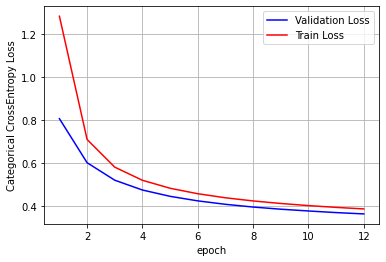

In [44]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('epoch') 
ax.set_ylabel("Categorical CrossEntropy Loss")

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

In [45]:
## Build Model with MLP + SGD Optimizer + Sigmoid Activation 

model_sig = Sequential()
model_sig.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)  ))
model_sig.add(Dense(128, activation='sigmoid'))
model_sig.add(Dense(output_dim, activation='softmax'))

model_sig.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_158 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_159 (Dense)            (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_sig.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sig.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 4s 9ms/step - loss: 2.2743 - accuracy: 0.2407 - val_loss: 2.2223 - val_accuracy: 0.2666
Epoch 2/12
469/469 [==============================] - 5s 10ms/step - loss: 2.1798 - accuracy: 0.4349 - val_loss: 2.1268 - val_accuracy: 0.5754
Epoch 3/12
469/469 [==============================] - 4s 9ms/step - loss: 2.0675 - accuracy: 0.5739 - val_loss: 1.9905 - val_accuracy: 0.6056
Epoch 4/12
469/469 [==============================] - 4s 9ms/step - loss: 1.9069 - accuracy: 0.6277 - val_loss: 1.7995 - val_accuracy: 0.6458
Epoch 5/12
469/469 [==============================] - 4s 9ms/step - loss: 1.6962 - accuracy: 0.6675 - val_loss: 1.5681 - val_accuracy: 0.6984
Epoch 6/12
469/469 [==============================] - 4s 9ms/step - loss: 1.4640 - accuracy: 0.7048 - val_loss: 1.3363 - val_accuracy: 0.7263
Epoch 7/12
469/469 [==============================] - 4s 9ms/step - loss: 1.2511 - accuracy: 0.7362 - val_loss: 1.1421 - val_accuracy: 0.7525
Epoch

Test Score : 0.6747231483459473
Test accuracy : 0.833299994468689


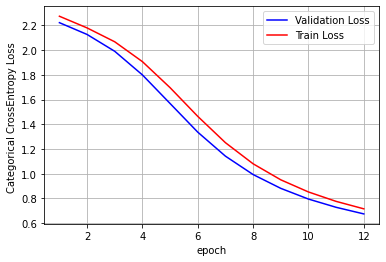

In [47]:
score = model_sig.evaluate(x_test, y_test, verbose=0)

print ("Test Score :", score[0])
print ("Test accuracy :", score[1])

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical CrossEntropy Loss ')

x = list(range(1, epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

In [48]:
## MLP + Sigmoid + ADAM 

model_adm = Sequential()
model_adm.add(Dense(512, activation='sigmoid', input_shape=(input_dim, )))
model_adm.add(Dense(256, activation='sigmoid'))
model_adm.add(Dense(128, activation='sigmoid'))
model_adm.add(Dense(output_dim, activation='softmax'))


model_adm.summary()

model_adm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_adm.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_161 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_162 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_163 (Dense)            (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
469/469 [==============================] - 6s 12ms/step - loss: 0.6326 - accuracy: 0.8170 - val_loss: 0.2443 - val_accuracy: 0.9290
Epoch 2/12
469/469 [==============================] - 6s 12ms/step - loss: 0.2019 - accuracy: 0.9406 -

In [49]:
 ## MLP + Relu + SGD 

from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_adm = Sequential()
model_adm.add(Dense(512, activation='relu', input_shape=(input_dim, )))
model_adm.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.06, seed=None)))
model_adm.add(Dense(128, activation='relu'))
##model.add(Dropout(0.3))
model_adm.add(Dense(64, activation='relu'))
model_adm.add(Dense(32, activation='relu'))
model_adm.add(Dense(16, activation='relu'))
##model.add(BatchNormalization())
model_adm.add(Dense(8, activation='relu'))
model_adm.add(Dense(output_dim, activation='softmax'))


model_adm.summary()

model_adm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_adm.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_164 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_165 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_166 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_167 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_168 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_169 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_170 (Dense)            (None, 8)               

In [50]:
 ## MLP + Relu + SGD + BatchNOrmalization + Dropout 

from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_adm = Sequential()
model_adm.add(Dense(512, activation='relu', input_shape=(input_dim, )))
model_adm.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.06, seed=None)))
model_adm.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.08, seed=None)))
model.add(Dropout(0.5))
model_adm.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.10, seed=None)))
model_adm.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model.add(Dropout(0.3))
model_adm.add(Dense(16, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)))
model.add(BatchNormalization())
model_adm.add(Dense(8, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.5, seed=None)))
model_adm.add(Dense(output_dim, activation='softmax'))


model_adm.summary()

model_adm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_adm.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_172 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_173 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_174 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_175 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_176 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_177 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_178 (Dense)            (None, 8)               

In [56]:
## Keras Hyper Param Tuning using SKLearn Wrapper . 
  
from keras.optimizers import Adam, RMSprop, SGD

def hyper_param(activ):
  model = Sequential()
  model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)))
  model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)))
  model.add(Dense(output_dim, activation='softmax'))
  
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], )
  return model


In [57]:
activ = ['sigmoid', 'relu', ]

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=hyper_param)

##param_grid = dict(activ=activ)
param_grid = {'activ':['sigmoid', 'relu'], 'epochs':[12, ], }
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)

Epoch 1/12
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3965 - accuracy: 0.8898
Epoch 2/12
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1648 - accuracy: 0.9500
Epoch 3/12
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1089 - accuracy: 0.9669
Epoch 4/12
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0761 - accuracy: 0.9772
Epoch 5/12
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0559 - accuracy: 0.9829
Epoch 6/12
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0406 - accuracy: 0.9877
Epoch 7/12
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0297 - accuracy: 0.9911
Epoch 8/12
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0216 - accuracy: 0.9935
Epoch 9/12
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0168 - accuracy: 0.9949
Epoch 10/12
1500/1500 [==============================] - 7s 5ms/step - loss: 0.013

In [60]:
print ("Best Model : ", grid_result.best_score_, grid_result.best_params_)
mns = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(mns, stds, params):
  print (mean, std, param)

Best Model :  0.9773333311080933 {'activ': 'relu', 'epochs': 12}
0.9763833284378052 0.002032093732623829 {'activ': 'sigmoid', 'epochs': 12}
0.9773333311080933 0.0022154592297583685 {'activ': 'relu', 'epochs': 12}
